Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)
    


Get default dataframe from NewLeverage Notebook

In [2]:
%store -r d_default_averageYear

Additional Settings

In [3]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import ticker
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
from matplotlib import cm
import datetime

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

#setting matplotlib style
plt.style.use('default')

#setting params for matplolib plots
plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title
plt.rcParams['xtick.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.size']=3.5  # fontsize of the figure title
#plt.rcParams['xtick.major.width']=1  # fontsize of the figure title
plt.rcParams['xtick.major.top']=False  # fontsize of the figure title
plt.rcParams['xtick.minor.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.minor.size']=3  # fontsize of the figure title
#plt.rcParams['legend.fontsize'] = 22

#setting grid style
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

#figsizes
figsize_OneGraph=(20,10)


Structural adjustments on dataset

In [4]:
df_raw[df_raw.name.str.startswith("JP")]

rssdid  chartertype     cert      bhcid        date                        name        assets      reloans         cash   persloans   agloans  subordinateddebt       equity    demanddep     transdep  brokereddep  timedepge100k  timedeple100k      ciloans        loans     loansnet  fedfundsrepoasset  tradingassets   securities  securities_ammcost  securitiesheldtomaturity  securitiesavailableforsale   liabilities      deposits   foreigndep  nonintbeardep   intbeardep  intbearfordep  fedfundsrepoliab  tradingliabilities  otherborrowedmoney   timesavdep  nontransdep      timedep  timedepuninsured       savdep    totsavdep  numemployees   intexpdep   qavgbaldue  qavgtreasuriesagencydebt      qavgmbs  qavgothersecurities  qavgtradingassets  qavgfedfundsrepoasset    qavgloans  qavgreloans1to4fam  qavgreloansother  qavgagloans  qavgciloans  qavgpersccards  qavgpersother  qavgforloans  qavgleases    qavgassets  qavgtransdep   qavgsavdep  qavgtimedepge100k  qavgtimedeple100k  \
935146    651448.0        200.0  21761.0  1039502.0  20041231.0  JPMORGAN CHASE BK DEARBORN  1.762400e+04          0.0        589.0         0.0       0.0               0.0      16737.0         86.0         86.0          0.0          500.0            0.0          0.0      15751.0      15751.0                0.0            0.0          0.0                 0.0                       0.0                         0.0  8.870000e+02  5.860000e+02          0.0           86.0        500.0            NaN               0.0                 0.0               223.0        500.0        500.0        500.0             500.0          0.0          0.0           0.0         4.0          0.0                       0.0          0.0                  0.0                NaN                    0.0      17307.0                 NaN               NaN          NaN          0.0             0.0            0.0           NaN         0.0  2.254300e+04           0.0          0.0                0.0              500.0   
935147    651448.0        200.0  21761.0  1039502.0  20050331.0  JPMORGAN CHASE BK DEARBORN  2.617200e+04          0.0       1928.0         0.0       0.0               0.0      17272.0       3462.0       3462.0          0.0          500.0            0.0          0.0      14069.0      14069.0                0.0            0.0          0.0                 0.0                       0.0                         0.0  8.900000e+03  3.962000e+03          0.0         3462.0        500.0            NaN               0.0                 0.0                 0.0        500.0        500.0        500.0             500.0          0.0          0.0           0.0         4.0          0.0                       0.0          0.0                  0.0                NaN                    0.0      14059.0                 NaN               NaN          NaN          0.0             0.0            0.0           NaN         0.0  4.097800e+04           0.0          0.0              500.0                0.0   
935148    651448.0        200.0  21761.0  1039502.0  20050630.0  JPMORGAN CHASE BK DEARBORN  2.627800e+04          0.0       1820.0         0.0       0.0               0.0      17549.0       3092.0       3092.0          0.0          500.0            0.0          0.0      14069.0      14069.0                0.0            0.0          0.0                 0.0                       0.0                         0.0  8.729000e+03  3.592000e+03          0.0         3092.0        500.0            NaN               0.0                 0.0                 0.0        500.0        500.0        500.0             500.0          0.0          0.0           0.0         7.0          0.0                       0.0          0.0                  0.0                NaN                    0.0      14069.0                 NaN               NaN          NaN          0.0             0.0            0.0           NaN         0.0  4.524400e+04           0.0          0.0              500.0                0.0   
935149    651448.0        20

In [5]:
#removing investment banks Goldman Sachs and Morgan Stanley
df_raw = df_raw[(df_raw.rssdid!=1456501) & (df_raw.bhcid!=2380443)]


Parse time

In [6]:
df_raw["date"] = pd.to_datetime(df_raw.date, format='%Y%m%d')

Timeseries labels for xaxis 

In [7]:
years = [str(year) for year in range(1976, 2014)]

years16 = [str(year) for year in range(1976, 2014, 4)]

Functions for plotting crisis shades on graph

In [8]:
def plot_crisis(ax):
    #1980Q1-Q3 crisis
    ax.axvspan(16, 19, alpha=0.5, color='gray')


    #1981Q3-1982Q4 crisis
    ax.axvspan(22, 27, alpha=0.5, color='gray')

    #1990Q3-1991Q2 crisis
    ax.axvspan(58, 61, alpha=0.5, color='gray')

    #2001Q2-2001Q4 crisis
    ax.axvspan(101, 103, alpha=0.5, color='gray')

    #2007Q4-2009Q3 crisis
    ax.axvspan(127, 134, alpha=0.5, color='gray')


In [9]:
'''
Takes xaxis with datetime objects
'''
def plot_crisis_datetime(ax):
    #1980 crisis
    ax.axvspan(datetime.datetime(1980,3,31), datetime.datetime(1980,9,30), alpha=0.5, color='gray')
    
    
    #1981Q3-1982Q4 crisis
    ax.axvspan(datetime.datetime(1981,9,30), datetime.datetime(1982,12,31), alpha=0.5, color='gray')
    
    #1990Q3-1991Q2 crisis
    ax.axvspan(datetime.datetime(1990,9,30), datetime.datetime(1991,6,30), alpha=0.5, color='gray')
    
    #2001Q2-2001Q4 crisis
    ax.axvspan(datetime.datetime(2001,6,30), datetime.datetime(2001,12,31), alpha=0.5, color='gray')
    
    #2007Q4-2009Q3 crisis
    ax.axvspan(datetime.datetime(2007,12,31), datetime.datetime(2009,9,30), alpha=0.5, color='gray')

Make ax-settings

In [10]:
def axsetting(ax):
    ax.set_xticks(range(0,151,4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.set_xticklabels(years, rotation=60)
    ax.grid()
    ax.set_xlim(0, 151)

Analysing asset side & liability side

In [11]:
#getting relevant data
df_assets = df_raw[["date","rssdid","bhcid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]

df_liab = df_raw[["date","rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,
             "deposits","foreigndep", "otherborrowedmoney", "tradingliabilities","subordinateddebt", "liabilities"]]

df_loan_loss = df_raw[["date","rssdid", "name", 'year', "quarter","assets", "equity", "loansnet", "loanleaselossprovision"]]

#aggregate data by year and quarter
df_agg = df_assets.groupby(["year", "quarter", "date"]).sum()
df_agg_liab = df_liab.groupby(["year", "quarter", "date"]).sum()
df_loan_loss_agg = df_loan_loss.groupby(["year", "quarter", "date"], as_index=False).sum()

#reset index
df_agg = df_agg.reset_index()
df_agg_liab = df_agg_liab.reset_index()

#clean fedfundsrepoasset by putting average for null value
average = (df_agg.loc[103].fedfundsrepoasset + df_agg.loc[105].fedfundsrepoasset) / 2
df_agg.loc[104, "fedfundsrepoasset"] = average

#fix foreign deposits missing values by filling with average of before and after
average = (df_agg_liab.loc[28].foreigndep + df_agg_liab.loc[32].foreigndep) / 2
df_agg_liab.loc[29, "foreigndep"] = average
df_agg_liab.loc[30,"foreigndep"] = average
df_agg_liab.loc[31, "foreigndep"] = average

#fix fedfundsrepoliab in year 2002
df_agg_liab.loc[104, "fedfundsrepoliab"] = df_agg_liab.loc[103].fedfundsrepoliab 

#computing other assets and other liabilities
df_agg["otherassets"] = df_agg["assets"] - (df_agg.iloc[:,6:11].sum(axis=1))
df_agg["otherliab"] = df_agg_liab["assets"] - (df_agg_liab.iloc[:,5:12].sum(axis=1))
df_agg_liab["otherliab"] = df_agg_liab["assets"] - (df_agg_liab.iloc[:,5:12].sum(axis=1))

#clean dataframe of nan, inf and zeros


#getting right yscale
df_agg_scaled = df_agg.select_dtypes(include=['float64'])/1000000000

#remove liabilities, its unnessesary
df_agg_liab.drop(["liabilities"], axis=1 , inplace=True)

#log liabilities
df_agg_liab_log = np.log(df_agg_liab.iloc[:,4:])
df_agg_liab_log = pd.concat([df_agg_liab.iloc[:,:4],df_agg_liab_log], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


In [12]:
df_agg_liab[(df_agg_liab.year==2002) & (df_agg_liab.quarter==1) ]

year  quarter       date        rssdid        assets       equity  fedfundsrepoliab      deposits   foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt    otherliab
104  2002.0      1.0 2002-03-31  6.857532e+09  6.393757e+09  593868723.0       501659598.0  3.668967e+09  603091719.0         522441229.0         177634910.0        92263263.0  233830006.0

In [13]:
df_assets[df_assets.rssdid==1998944.0]

date     rssdid  bhcid                        name    year  quarter    assets     cash  fedfundsrepoasset  securities  loansnet  tradingassets
1524794 1992-12-31  1998944.0    0.0  NEW FIRST CITY TX-TYLER NA  1992.0      4.0  233272.0  16456.0            96650.0     45528.0   73812.0            0.0

In [14]:
df_agg_pct_change = df_agg.set_index("date")

#df_agg_pct_change.resample("Y").sum().pct_change()
#df_agg_pct_change.pct_change(freq="Y").assets.dropna()

In [15]:
df_agg_pct_change = df_agg.set_index("date")
df_agg_pct_change = df_agg_pct_change.resample("Y").last()
df_agg_pct_change["pct_change"] = df_agg_pct_change.assets.pct_change()
#df_agg_pct_change = df_agg_pct_change.iloc[1:]


Loan Loss Provision

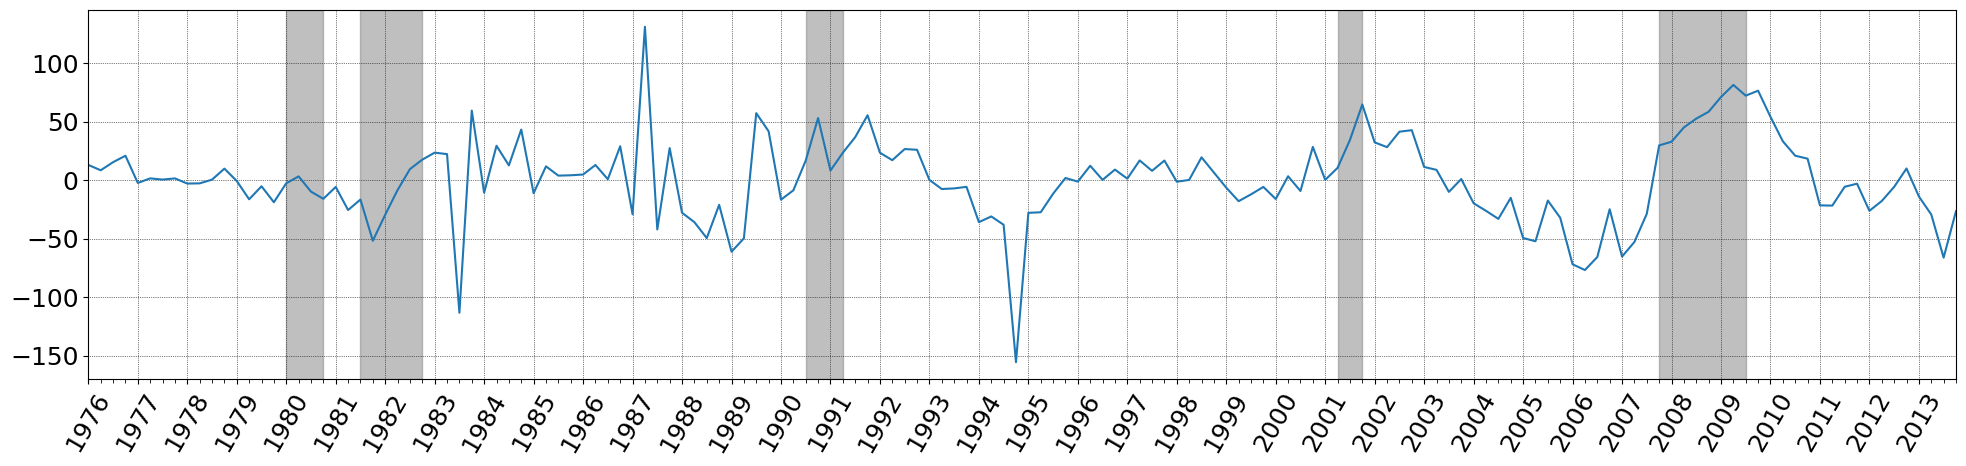

In [16]:
fig, ax = plt.subplots(figsize=(20,5))

cycle, trend = sm.tsa.filters.hpfilter(np.log(df_loan_loss_agg.loanleaselossprovision), 1600)
cycle = cycle*100
cycle.plot(ax=ax)

axsetting(ax)
plot_crisis(ax)


plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_LoanLossProvision_7613.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


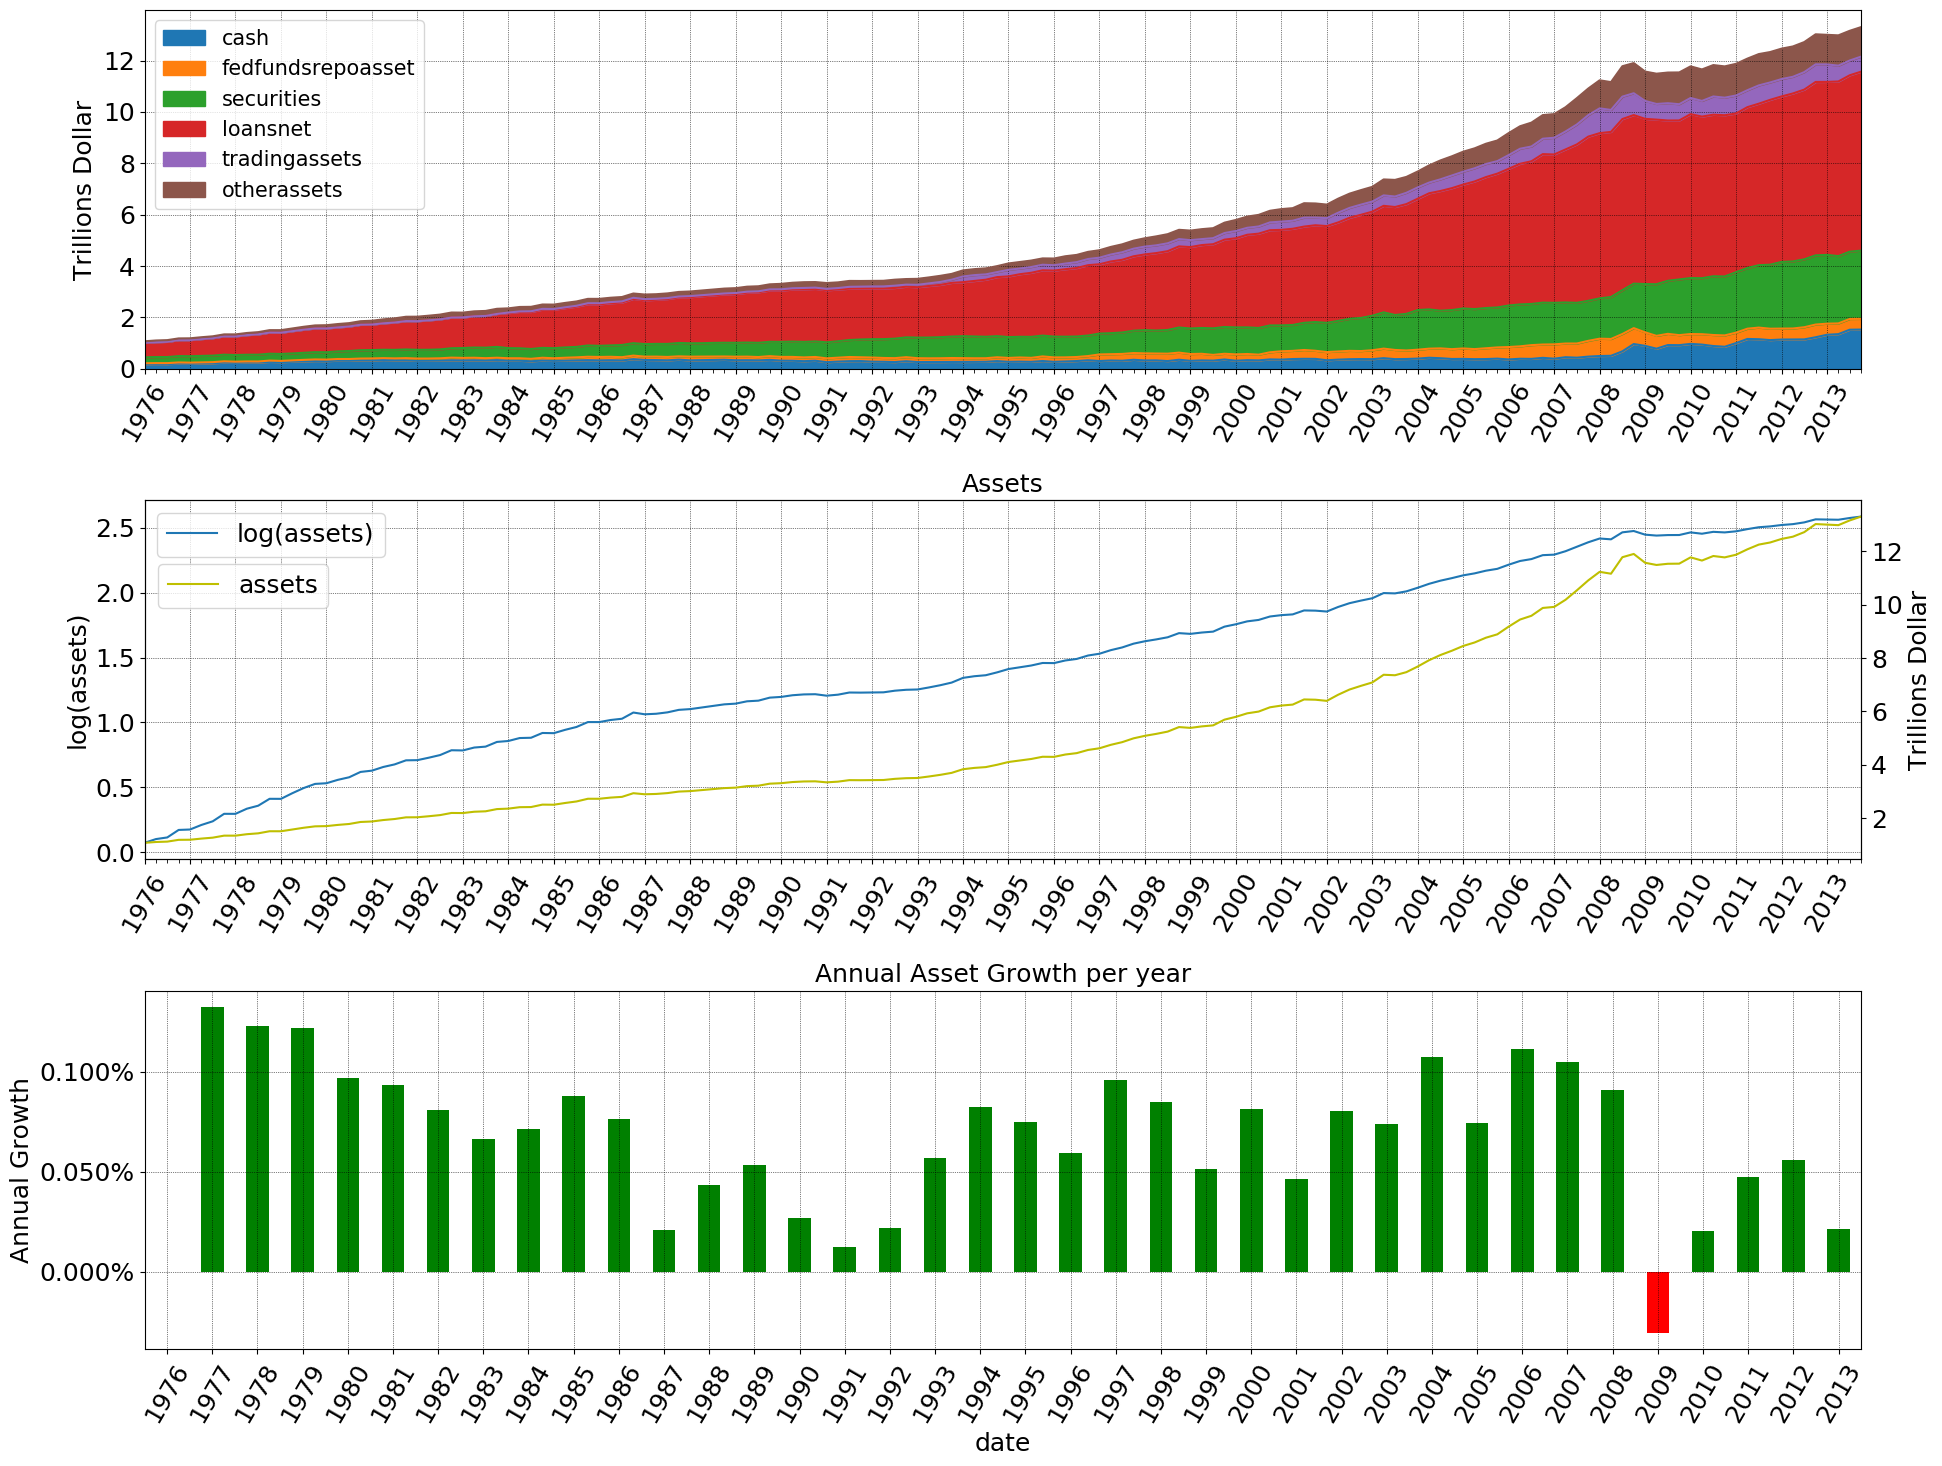

In [17]:
fig, ax = plt.subplots(3,1,figsize=(20,15))
ax = ax.ravel()

#ax_twin = ax[1].twinx()



#graph: absolute assets
ax[0].set_ylabel("Trillions Dollar")
ax[0].set_xticks(range(0,151,4))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))

df_agg_scaled.plot.area(ax=ax[0], y=["cash","fedfundsrepoasset" ,"securities",
                           "loansnet", "tradingassets", "otherassets"])


ax[0].set_xticklabels(years, rotation=60)
ax[0].set_xlim(0, 151)
ax[0].legend(prop={'size': 15})
ax[0].grid()

#ax.yaxis.set_major_formatter(mlt.ticker.StrMethodFormatter("{x:g}")) 

#graph: log(assets)
df_agg_log = np.log(df_agg_scaled)
ax[1].set_xticks(range(0,151,4))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
df_agg_log.assets.plot(ax=ax[1], color="C0")
ax[1].set_xticklabels(years, rotation=60)
ax[1].set_ylabel("log(assets)")
ax[1].legend(["log(assets)"])
ax[1].grid()
ax[1].set_xlim(0, 151)
ax[1].set_title("Assets")





#plot growth graph
#ax4.bar(height =df_agg_pct_change.pct_change, x=df_agg_pct_change.index)
df_agg_pct_change["positive"] = df_agg_pct_change["pct_change"] > 0
df_agg_pct_change.plot(y="pct_change", kind="bar", ax=ax[2], color=df_agg_pct_change.positive.map({True: 'g', False: 'r'}))
ax[2].grid()
ax[2].get_legend().remove()
ax[2].set_xticks(range(0,38))
ax[2].set_ylabel("Annual Growth")
ax[2].set_xticklabels(years, rotation=60)
ax[2].set_title("Annual Asset Growth per year")
ax[2].yaxis.set_major_formatter(ticker.PercentFormatter())

'''
#plot defaults graph
ax[4].set_title("Share of commercial banks default per year")
ax[4].set_ylabel("Share of all commercial banks")
ax[4].set_xlabel("Year")
x = np.arange(len(d_default_averageYear))
ax[4].bar(x, d_default_averageYear.Percentage)
ax[4].set_xticks(range(0,38))
ax[4].set_xticklabels(years, rotation=60)
ax[4].set_xlim(-1, 38)
ax[4].grid()
'''


#plot twin axis for second graph
ax_twin = ax[1].twinx()
ax_twin.plot(df_agg_scaled.assets, "y")
ax_twin.legend(["assets"], loc=[0.008, 0.7])
ax_twin.set_ylabel("Trillions Dollar")






plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_AssetDistribution_7613.png')

Cycle of both assets and liabilities positions

In [18]:

# choosing asset positions
df_agg_log_assets = df_agg_log.iloc[:, 5:11]

#choosing liabilities positions
df_agg_liab_log_positions =  df_agg_liab_log.iloc[:,5:13]

#concat
#df_agg_allpositions = pd.concat([df_agg_log_assets, df_agg_liab_log_positions], axis=1)
#index_year = df_agg_liab_log.iloc[:,:3] 
#df_agg_allpositions = pd.concat([index_year, df_agg_allpositions], axis=1)

#replace inf with nan
df_agg_liab_log_positions.replace([np.inf, -np.inf], np.nan, inplace=True)
df_agg_log_assets.replace([np.inf, -np.inf], np.nan, inplace=True)


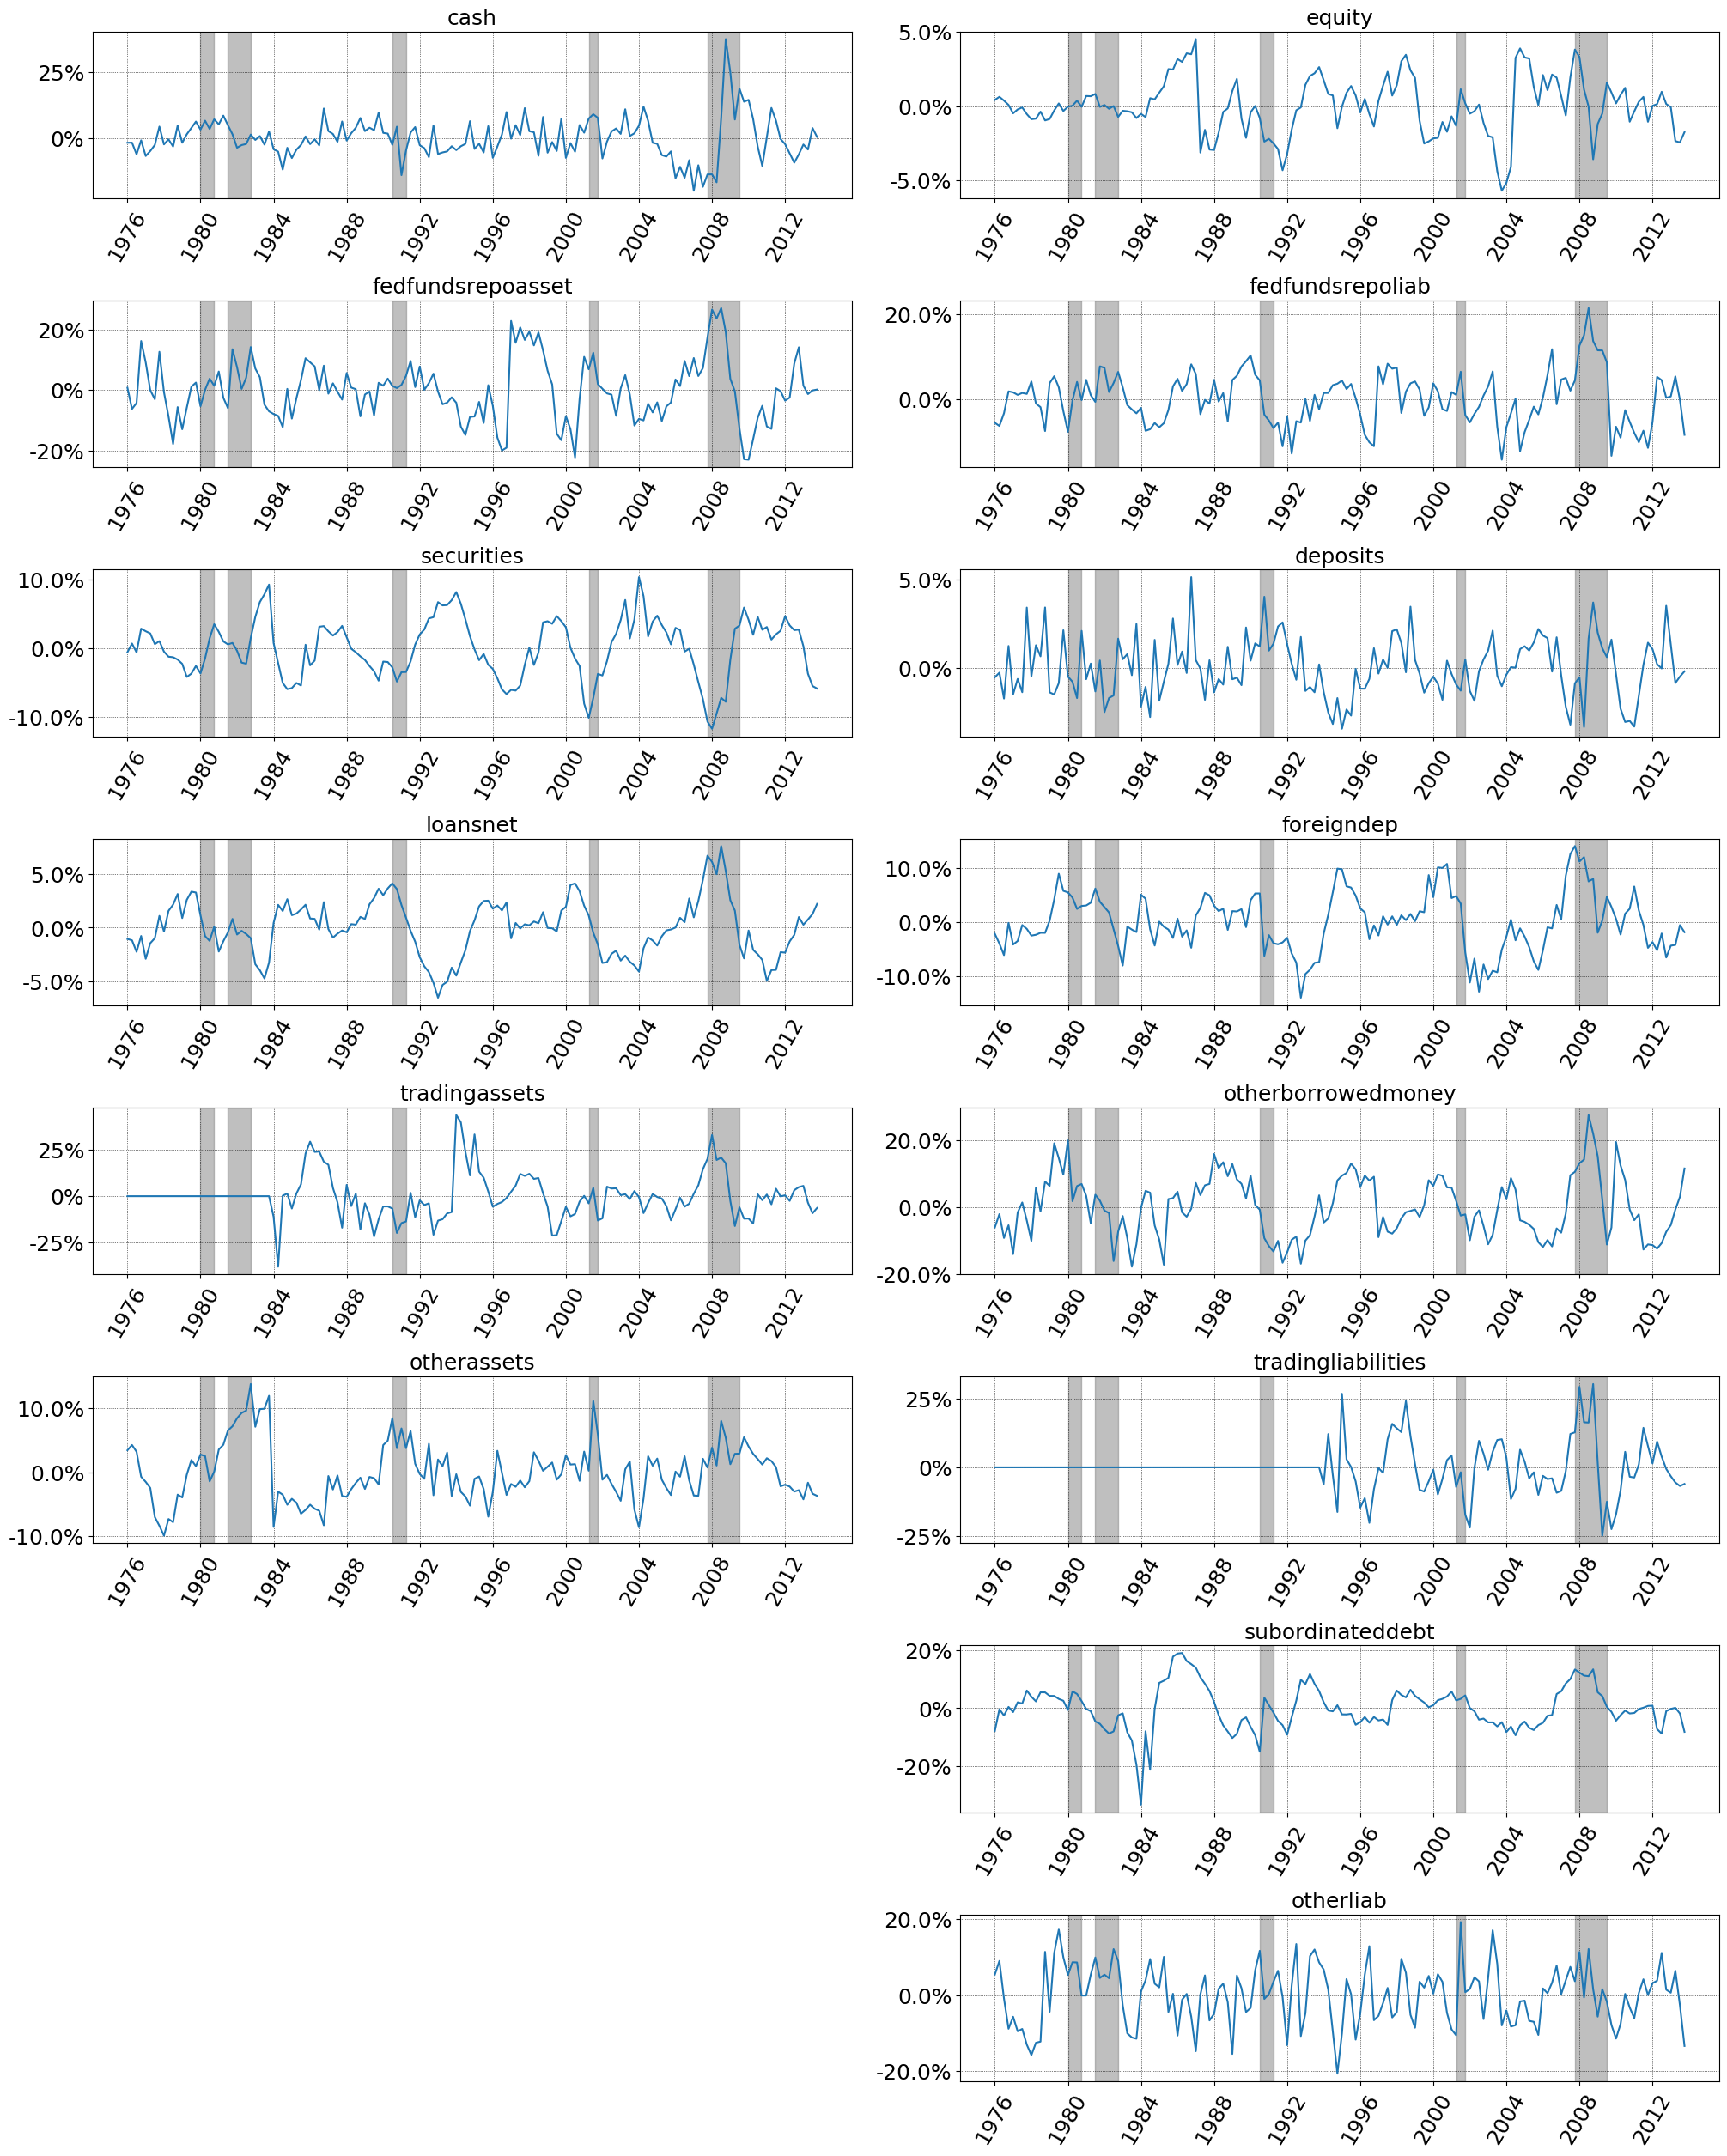

In [19]:
fig, ax = plt.subplots(8,2, figsize=(20,25), constrained_layout=True)
ax = ax.ravel()


#excluding other liabilities

#getting positon names
asset_positions_array = df_agg_log_assets.columns.values
liab_positions_array = df_agg_liab_log_positions.columns.values

#overall counter
i = 0

#asset positions counter
x = 0

#liabilities counter
y = 0

#dataframe to save all cycles
df_cycle_assets = pd.DataFrame()
df_cycle_liab = pd.DataFrame()

'''
This whole loop computes the the cycles for both asset and liabilities positions. It differentiates them,
so asset positions are plotted on the left column and liabilities positions on the right column.
Also, there are two cases, trading assets and trading liabilities which are treated special because of nan values
which mess up the cycle computation. 
'''

for i in range(16):
    #when we are in the left column and there is still an asset position
    if ((i % 2) == 0 and (x) < len(asset_positions_array)):
        #if position is tradingassets then fix wrong values
        if (asset_positions_array[x].startswith("trading")):
            #remove zeros for cycle estimation
            temp_series = df_agg_log_assets[asset_positions_array[x]]
            temp_series.dropna(inplace=True)
            #compute cycle
            cycle, trend = sm.tsa.filters.hpfilter(temp_series, 1600)
            #insert zeros back into cycle
            count_missing_values = 152 - cycle.size
            zeros = pd.Series(np.zeros(count_missing_values))
            cycle = pd.concat([zeros, cycle])
            ax[i].set_title(asset_positions_array[x])
            #save cycle
            df_cycle_assets[asset_positions_array[x]]=cycle
            #ax[i].set_ylabel("log(" + asset_positions_array[x] + ")")
        #not tradingassets then calculate cycle here
        else:
            #replace missing values with zero
            df_agg_log_assets[asset_positions_array[x]].fillna(0, inplace=True)
            #compute cycle
            cycle, trend = sm.tsa.filters.hpfilter(df_agg_log_assets[asset_positions_array[x]], 1600)
            ax[i].set_title(asset_positions_array[x])
            #save cycle
            df_cycle_assets[asset_positions_array[x]]=cycle
            #ax[i].set_ylabel("log(" + asset_positions_array[x] + ")")
        #plot cycle    
        ax[i].set_xticks(range(0,152,16))
        ax[i].set_xticklabels(years16, rotation=60)
        ax[i].plot(cycle*100)
        ax[i].grid()
        ax[i].yaxis.set_major_formatter(ticker.PercentFormatter())
        #plot crisis
        plot_crisis(ax[i])
        #increase asset counter by one
        x = x+1
    #when we are in the right column 
    elif ((i % 2) != 0):
        #if position is tradingliab then fix wrong values
        if (liab_positions_array[y].startswith("trading")):
            #remove zeros for cycle estimation
            temp_series = df_agg_liab_log_positions[liab_positions_array[y]]
            temp_series.dropna(inplace=True)
            #compute cycle
            cycle, trend = sm.tsa.filters.hpfilter(temp_series, 1600)
            #insert zeros back into cycle
            count_missing_values = 152 - cycle.size
            zeros = pd.Series(np.zeros(count_missing_values))
            cycle = pd.concat([zeros, cycle])
            ax[i].set_title(liab_positions_array[y])
            #save cycle
            df_cycle_liab[liab_positions_array[y]]=cycle
            #ax[i].set_ylabel("log(" + liab_positions_array[y] + ")")
        #not tradingassets then calculate cycle here
        else:
            #replace missing values with zero
            df_agg_liab_log_positions[liab_positions_array[y]].fillna(0, inplace=True)
            #compute cycle
            cycle, trend = sm.tsa.filters.hpfilter(df_agg_liab_log_positions[liab_positions_array[y]], 1600)
            ax[i].set_title(liab_positions_array[y])
            #save cycle
            df_cycle_liab[liab_positions_array[y]]=cycle
            #ax[i].set_ylabel("log(" + liab_positions_array[y] + ")")
        #plot cycle
        ax[i].set_xticks(range(0,152,16))
        ax[i].set_xticklabels(years16, rotation=60)
        ax[i].plot(cycle*100)
        ax[i].yaxis.set_major_formatter(ticker.PercentFormatter())
        y = y+1
        ax[i].grid()
        plot_crisis(ax[i])
    


fig.delaxes(ax[12])
fig.delaxes(ax[14])


plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_PositionsCyclical_7613.png')

Cyclical Assets

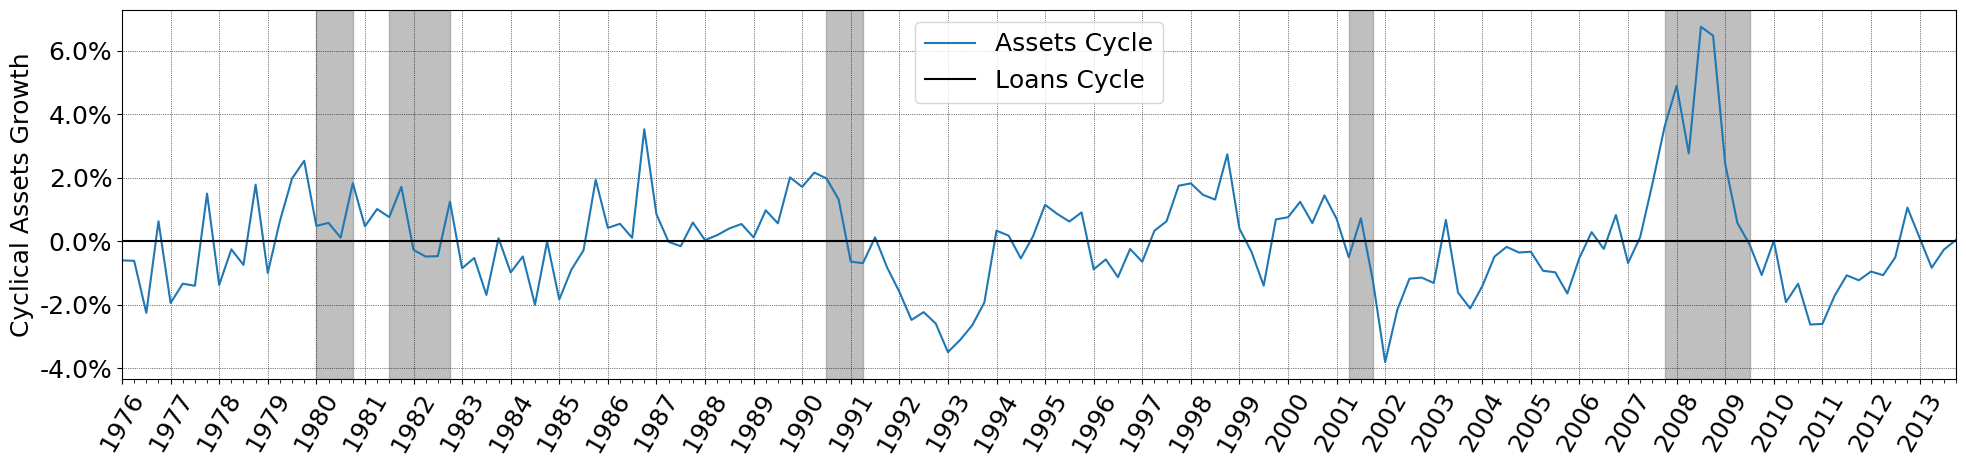

In [20]:
#graph: cyclical of log(assets)
fig, ax = plt.subplots(figsize=(20,5))

cycle, trend = sm.tsa.filters.hpfilter(df_agg_log.assets, 1600)
df_agg_log["cycle"] = cycle*100
df_agg_log.cycle.plot(ax=ax)

#plot other account cyles
#temp_cycles = df_cycle_assets.copy()
#temp_cycles = temp_cycles*100
#temp_cycles.loansnet.plot(ax=ax)
#temp_cycles.securities.plot(ax=ax)

ax.set_ylabel("Cyclical Assets Growth")
ax.axhline(color="black")
ax.set_xticks(range(0,151,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_xticklabels(years, rotation=60)
red_patch = mpatches.Patch(color='red',alpha=0.5)
red_patch1 = mpatches.Patch(color='C0', lw=0.2)
#ax.legend(handles=[red_patch, red_patch1], labels=["crisis", "detrended log(assets)"])
ax.legend(["Assets Cycle", "Loans Cycle", "Securities Cycle"])
ax.grid()
ax.set_xlim(0, 151)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plot_crisis(ax)

plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_CyclicalAssets_7613.png')

In [21]:
df_agg

year  quarter       date        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets   otherassets    otherliab
0    1976.0      1.0 1976-03-31  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0  5.979932e+07   32190192.0
1    1976.0      2.0 1976-06-30  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0  6.314197e+07   35562537.0
2    1976.0      3.0 1976-09-30  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0  6.542551e+07   34335681.0
3    1976.0      4.0 1976-12-31  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0  6.589929e+07   33804637.0
4    1977.0      1.0 1977-03-31  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0  6.847658e+07   37199022.0
5    1977.0      2.0 1977-06-30  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0  7.105964e+07   38182517.0
6    1977.0      3.0 1977-09-30  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0  7.114599e+07   40983329.0
7    1977.0      4.0 1977-12-31  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0  7.357152e+07   41954411.0
8    1978.0      1.0 1978-03-31  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0  7.595768e+07   43555471.0
9    1978.0      2.0 1978-06-30  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0  8.176384e+07   47992509.0
10   1978.0      3.0 1978-09-30  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0  8.533574e+07   51324227.0
11   1978.0      4.0 1978-12-31  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0  9.345297e+07   69221604.0
12   1979.0      1.0 1979-03-31  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0  9.755706e+07   62916509.0
13   1979.0      2.0 1979-06-30  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0  1.059503e+08   78010387.0
14   1979.0      3.0 1979-09-30  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0  1.135400e+08   87909800.0
15   1979.0      4.0 1979-12-31  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0  1.176389e+08   86418900.0
16   1980.0      1.0 1980-03-31  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0  1.251570e+08   86997490.0
17   1980.0      2.0 1980-06-30  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0  1.302572e+08   94594743.0
18   1980.0      3.0 1980-09-30  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0  1.303950e+08   99121394.0
19   1980.0      4.0 1980-12-31  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0  1.376221e+08   94964077.0
20   1981.0      1.0 1981-03-31  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0  1.477132e+08   98940912.0
21   1981.0      2.0 1981-06-30  7.413774e+09  5.854609e+09  1.927512e+09  3.450669e+08         72471117.0  3.271

In [22]:
temp_adjustment = df_agg.copy()

new_value = temp_adjustment[temp_adjustment.date == "2008-09-30"].assets - 270000000

#temp_adjustment.loc[temp_adjustment.date == "2008-09-30", ["assets"]] = new_value.loc[130]
#temp_adjustment.loc[temp_adjustment.date >= "2008-06-30", ["assets"]] = temp_adjustment.loc[temp_adjustment.date >= "2008-06-30", ["assets"]] - 270000000
#temp_adjustment.iloc[126,5] = new_value.loc[126]

temp_adjustment.iloc[130:,5] = temp_adjustment.iloc[130:,5] - 270000000 #JPMorgan Chase acquires Washington Mutual

temp_adjustment.iloc[127:,5] = temp_adjustment.iloc[127:,5] - 80000000 #Wachovia Corporation acquires assets of World Savings Bank
#temp_adjustment.loc[126] = 0
#temp_adjustment = temp_adjustment.assets[2008-09-30]
#temp_adjustment.loc[temp_adjustment.date == "2007-09-30"]["assets"]
temp_adjustment.iloc[130:,5] - 270000000


130    1.115767e+10
131    1.127974e+10
132    1.094939e+10
133    1.086717e+10
134    1.091163e+10
135    1.091631e+10
136    1.115214e+10
137    1.103245e+10
138    1.120271e+10
139    1.115098e+10
140    1.125104e+10
141    1.145396e+10
142    1.163052e+10
143    1.170947e+10
144    1.184202e+10
145    1.192667e+10
146    1.209733e+10
147    1.240030e+10
148    1.237982e+10
149    1.235904e+10
150    1.253616e+10
151    1.268061e+10
Name: assets, dtype: float64

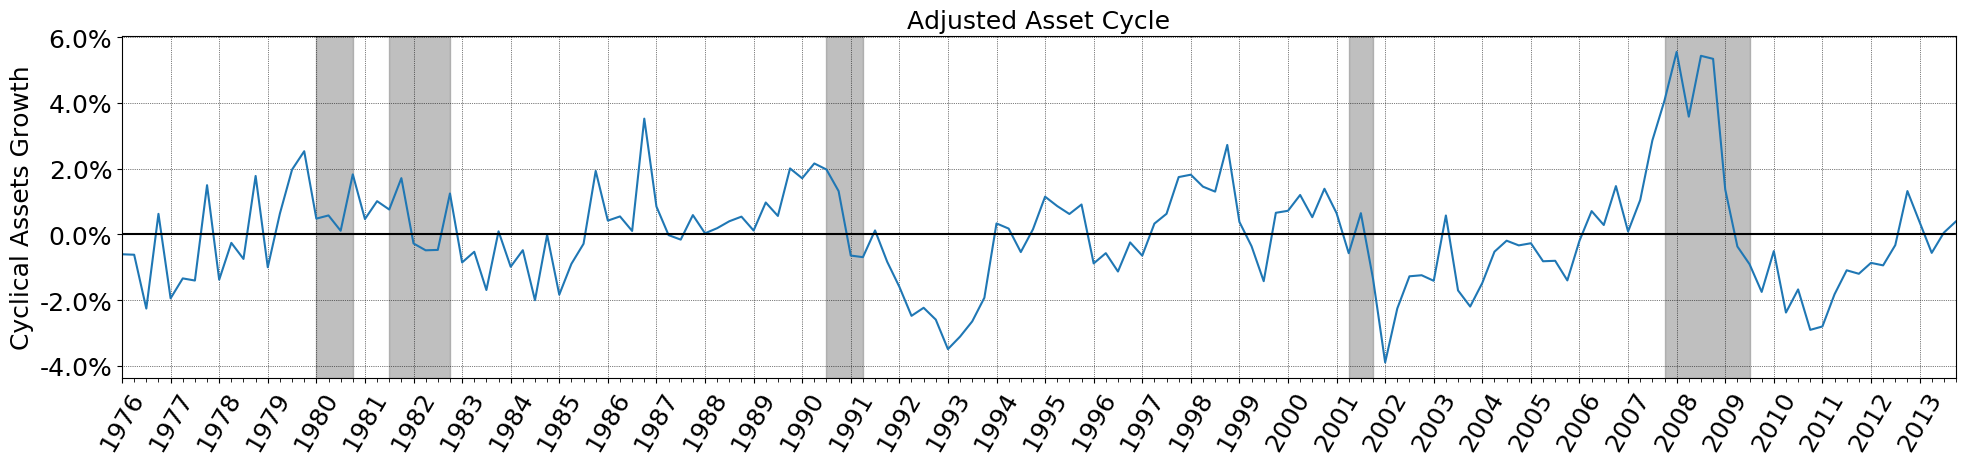

In [23]:
#graph: cyclical of log(assets)
fig, ax = plt.subplots(figsize=(20,5))

#First graph
"""
cycle, trend = sm.tsa.filters.hpfilter(df_agg_log.assets, 1600)
df_agg_log["cycle"] = cycle*100
df_agg_log.cycle.plot(ax=ax[0])

ax[0].set_ylabel("Cyclical Assets Growth")
ax[0].axhline(color="black")
ax[0].set_xticks(range(0,151,4))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].set_xticklabels(years, rotation=60)
red_patch = mpatches.Patch(color='red',alpha=0.5)
red_patch1 = mpatches.Patch(color='C0', lw=0.2)
#ax.legend(handles=[red_patch, red_patch1], labels=["crisis", "detrended log(assets)"])
ax[0].grid()
ax[0].set_xlim(0, 151)
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[0].set_title("Asset Cycle")
plot_crisis(ax[0])
"""
#Second graph
cycle, trend = sm.tsa.filters.hpfilter(np.log(temp_adjustment.assets), 1600)
df_agg_log["cycle"] = cycle*100
df_agg_log.cycle.plot(ax=ax)

ax.set_ylabel("Cyclical Assets Growth")
ax.axhline(color="black")
ax.set_xticks(range(0,151,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_xticklabels(years, rotation=60)
red_patch = mpatches.Patch(color='red',alpha=0.5)
red_patch1 = mpatches.Patch(color='C0', lw=0.2)
#ax.legend(handles=[red_patch, red_patch1], labels=["crisis", "detrended log(assets)"])
ax.grid()
ax.set_xlim(0, 151)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_title("Adjusted Asset Cycle")
plot_crisis(ax)

plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_CyclicalAssetsAdjusted_7613.png')

Compute correlation tables

Functions

In [24]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    pvalues = pvalues.astype("float")
    return pvalues

In [25]:
def calculate_pvalues_2(df1, df2):
    df1 = df1.dropna()._get_numeric_data()
    df2 = df2.dropna()._get_numeric_data()
    df1cols = pd.DataFrame(columns=df1.columns)
    df2cols = pd.DataFrame(columns=df2.columns)
    pvalues = df2cols.transpose().join(df1cols, how='outer')
    for r in df1.columns:
        for c in df2.columns:
            pvalues[r][c] = round(pearsonr(df1[r], df2[c])[1], 4)
    pvalues = pvalues.astype("float")
    return pvalues

In [26]:
#apply color to significant values
def color_sig(val):
    
    color = 'royalblue' if val[-3:] == "***" else 'default'
    
    return 'background-color: %s' % color

Color scale for colormap

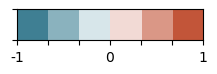

In [27]:
cmap=sns.diverging_palette(220, 20, sep=20)

sns.palplot(cmap, size=0.4)

ax = plt.gca()

#ax.xaxis.set_major_locator(ticker.FixedLocator([-0.5,0.5,1.5,2.5,3.5,4.5,5.5]))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1,offset=0))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([-1,"","",0,"","",1 ]))
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.set_xticks([-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
#ax.set_xticklabels()

Compute Correlations

In [28]:
df_agg_log

year    quarter    rssdid     bhcid    assets      cash  fedfundsrepoasset  securities  loansnet  tradingassets  otherassets  otherliab     cycle
0   -13.134436 -20.723266  1.998908  1.400516  0.071050 -1.693375          -3.323719   -1.472848 -0.571553            NaN    -2.816761  -3.436093 -0.602064
1   -13.134436 -20.030119  2.001522  1.409213  0.099967 -1.661493          -3.360419   -1.445313 -0.541724            NaN    -2.762370  -3.336463 -0.616378
2   -13.134436 -19.624654  2.000468  1.417602  0.112649 -1.674249          -3.307651   -1.443399 -0.521484            NaN    -2.726843  -3.371570 -2.253865
3   -13.134436 -19.336971  2.002789  1.427576  0.170502 -1.589668          -3.070429   -1.393968 -0.475591            NaN    -2.719628  -3.387157  0.626882
4   -13.133930 -20.723266  2.001237  1.431152  0.173825 -1.617892          -3.107793   -1.382902 -0.466003            NaN    -2.681264  -3.291473 -1.942060
5   -13.133930 -20.030119  2.004028  1.441965  0.208847 -1.567835          -3.166294   -1.371191 -0.420472            NaN    -2.644236  -3.265378 -1.336012
6   -13.133930 -19.624654  2.001277  1.448962  0.237079 -1.513949          -3.162954   -1.371940 -0.385014            NaN    -2.643021  -3.194590 -1.400889
7   -13.133930 -19.336971  2.000974  1.454858  0.294836 -1.413561          -2.973641   -1.352633 -0.333538            NaN    -2.609497  -3.171172  1.498672
8   -13.133424 -20.723266  1.997872  1.461046  0.294694 -1.451264          -3.073082   -1.352812 -0.317876            NaN    -2.577579  -3.133720 -1.375153
9   -13.133424 -20.030119  1.998600  1.472966  0.334280 -1.402812          -3.119219   -1.344918 -0.268516            NaN    -2.503920  -3.036710 -0.255703
10  -13.133424 -19.624654  1.998966  1.488443  0.357538 -1.401616          -3.175517   -1.330156 -0.233116            NaN    -2.461162  -2.969592 -0.744089
11  -13.133424 -19.336971  1.998029  1.503788  0.410615 -1.294632          -3.019083   -1.317763 -0.193933            NaN    -2.370297  -2.670442  1.779179
12  -13.132919 -20.723266  1.997395  1.511859  0.410338 -1.333553          -3.056428   -1.307850 -0.187808            NaN    -2.327318  -2.765947 -0.997879
13  -13.132919 -20.030119  1.996840  1.515686  0.453803 -1.276310          -2.948917   -1.310464 -0.142508            NaN    -2.244785  -2.550913  0.638428
14  -13.132919 -19.624654  1.998572  1.534672  0.493804 -1.228401          -2.843465   -1.288793 -0.107128            NaN    -2.175600  -2.431444  1.972335
15  -13.132919 -19.336971  1.996876  1.551677  0.525575 -1.182323          -2.793019   -1.260365 -0.080733            NaN    -2.140136  -2.448549  2.531421
16  -13.132414 -20.723266  1.998784  1.586277  0.530742 -1.192387          -2.833788   -1.253798 -0.075444            NaN    -2.078186  -2.441876  0.481639
17  -13.132414 -20.030119  2.000737  1.616833  0.556846 -1.139954          -2.742786   -1.214228 -0.068559            NaN    -2.038244  -2.358153  0.578464
18  -13.132414 -19.624654  2.002144  1.649936  0.576778 -1.154248          -2.669307   -1.166959 -0.047100            NaN    -2.037187  -2.311410  0.112425
19  -13.132414 -19.336971  2.002409  1.704733  0.617976 -1.102723          -2.656299   -1.128421 -0.008204            NaN    -1.983244  -2.354257  1.827962
20  -13.131909 -20.723266  2.002564  1.731037  0.627861 -1.108610          -2.573304   -1.121487 -0.006229            NaN    -1.912483  -2.313232  0.468232
21  -13.131909 -20.030119  2.003340  1.767229  0.656230 -1.064017          -2.624567   -1.117441  0.028472            NaN    -1.870949  -2.220386  1.012416
22  -13.131909 -19.624654  2.002744  1.801554  0.676071 -1.090120          -2.624146   -1.103859  0.061466            NaN    -1.817217  -2.140537  0.758813
23  -13.131909 -19.336971  2.000204  1.846377  0.707453 -1.116518          -2.396778   -1.083929  0.098776            NaN    -1.781972  -2.162705  1.713061
24  -13.131404 -20.723266  2.000496  1.885432  0.708909 -1.160598          -2.423245   -1.077649  0.108498    

In [29]:
#Correlations
corr_assets = df_cycle_assets.corr()

corr_liab = df_cycle_liab.corr()

corr_comb = df_cycle_liab.apply(lambda x: df_cycle_assets.corrwith(x))

#Autocorrelations

df_cycle_auto_corr = pd.DataFrame()

#for total assets cycle
temp_array = []
for i in range(0,9):
    temp_array.append(df_agg_log.cycle.autocorr(lag=i))
    
df_cycle_auto_corr["assets"] = temp_array

#for rest asset positions
for column in df_cycle_assets:
    temp_array = []
    for i in range(0,9):
        temp_array.append(df_cycle_assets[column].autocorr(lag=i))
    df_cycle_auto_corr[column] = temp_array

#for rest liab positions
for column in df_cycle_liab:
    temp_array = []
    for i in range(0,9):
        temp_array.append(df_cycle_liab[column].autocorr(lag=i))
    df_cycle_auto_corr[column] = temp_array



df_cycle_auto_corr.index.rename("lag", inplace=True)

df_cycle_auto_corr.iloc[:,0:7]

df_cycle_auto_corr.iloc[:,7:]

equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  otherliab
lag                                                                                                                       
0    1.000000          1.000000  1.000000    1.000000            1.000000            1.000000          1.000000   1.000000
1    0.723293          0.628063  0.328080    0.798504            0.731746            0.529164          0.805696   0.368007
2    0.449616          0.404419  0.292106    0.661453            0.541543            0.243973          0.689890   0.012917
3    0.179874          0.211710  0.055729    0.463610            0.361965            0.147006          0.509253   0.078217
4    0.009426          0.183654  0.348144    0.329830            0.283648           -0.132563          0.336406   0.145914
5   -0.103217          0.005744 -0.196956    0.117763            0.173004           -0.291591          0.190992  -0.091779
6   -0.109206         -0.058821 -0.179869    0.001884            0.064673           -0.387505          0.081116  -0.295527
7   -0.155159         -0.182500 -0.321517   -0.124807           -0.095045           -0.427252         -0.068200  -0.089373
8   -0.143907         -0.143367  0.106174   -0.155675           -0.215672           -0.382195         -0.173296   0.008344

Correlation table for assets

In [30]:
from matplotlib import colors

corr_assets = corr_assets.round(2)
pval = calculate_pvalues(df_cycle_assets)
A = pval.copy()

#cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

'''
Alter matrix s background color based on the value of matrix A
'''

def b_g(s, cmap='coolwarm', low=0, high=0):
    # Pass the columns from Dataframe A 
    a = A.loc[:,s.name].copy()
    rng = a.max() - a.min()
    norm = colors.Normalize(a.min() - (rng * low),
                        a.max() + (rng * high))
    normed = norm(a.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]


#create three masks
r1 = corr_assets.applymap(lambda x: '{}*'.format(x))
r2 = corr_assets.applymap(lambda x: '{}**'.format(x))
r3 = corr_assets.applymap(lambda x: '{}***'.format(x))
# apply them where appropriate
corr_assets_sig = corr_assets.copy()
corr_assets_sig = corr_assets_sig.mask(pval<=0.1,r1)
corr_assets_sig = corr_assets_sig.mask(pval<=0.05,r2)
corr_assets_sig = corr_assets_sig.mask(pval<=0.01,r3)

#corr_assets_sig = corr_assets.style.background_gradient(cmap='coolwarm', axis=None)\
#    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#    .set_precision(2)\
#    .format(lambda x: '{}***'.format(x))\


corr_assets_sig = corr_assets_sig.style.apply(b_g,cmap='coolwarm')



corr_assets_sig


In [31]:
pval = calculate_pvalues(df_cycle_assets)

corr_assets = corr_assets.round(2)

#create three masks
r1 = corr_assets.applymap(lambda x: '{}*'.format(x))
r2 = corr_assets.applymap(lambda x: '{}**'.format(x))
r3 = corr_assets.applymap(lambda x: '{}***'.format(x))
# apply them where appropriate
corr_assets_sig = corr_assets.copy()
corr_assets_sig = corr_assets_sig.mask(pval<=0.1,r1)
corr_assets_sig = corr_assets_sig.mask(pval<=0.05,r2)
corr_assets_sig = corr_assets_sig.mask(pval<=0.01,r3)

corr_assets_sig

corr_assets_sig = corr_assets_sig.astype("str")

corr_assets_sig.to_latex("LatexVorlage/graphs/Tables/LatexTables/corr_assets.tex")

corr_assets_sig.style.applymap(color_sig)

Correlation table for liabilities

In [32]:
corr_liab.style.background_gradient(cmap='coolwarm', axis=None)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\

In [33]:
pval = calculate_pvalues(df_cycle_liab)

corr_liab = corr_liab.round(2)

#create three masks
r1 = corr_liab.applymap(lambda x: '{}*'.format(x))
r2 = corr_liab.applymap(lambda x: '{}**'.format(x))
r3 = corr_liab.applymap(lambda x: '{}***'.format(x))
# apply them where appropriate
corr_liab_sig = corr_liab.copy()
corr_liab_sig = corr_liab_sig.mask(pval<=0.1,r1)
corr_liab_sig = corr_liab_sig.mask(pval<=0.05,r2)
corr_liab_sig = corr_liab_sig.mask(pval<=0.01,r3)



corr_liab_sig = corr_liab_sig.astype("str")

corr_liab_sig.to_latex("LatexVorlage/graphs/Tables/LatexTables/corr_liab.tex")

corr_liab_sig.style.applymap(color_sig)

Correlation table for correlation assets with liabilities

In [34]:
corr_comb.style.background_gradient(cmap='coolwarm', axis=None)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\


In [35]:
pval = calculate_pvalues_2(df_cycle_liab, df_cycle_assets)

corr_comb = corr_comb.round(2)

#create three masks
r1 = corr_comb.applymap(lambda x: '{}*'.format(x))
r2 = corr_comb.applymap(lambda x: '{}**'.format(x))
r3 = corr_comb.applymap(lambda x: '{}***'.format(x))
# apply them where appropriate
corr_comb_sig = corr_comb.copy()
corr_comb_sig = corr_comb_sig.mask(pval<=0.1,r1)
corr_comb_sig = corr_comb_sig.mask(pval<=0.05,r2)
corr_comb_sig = corr_comb_sig.mask(pval<=0.01,r3)


corr_comb_sig = corr_comb_sig.astype("str")

corr_comb_sig.to_latex("LatexVorlage/graphs/Tables/LatexTables/corr_liab_assets.tex")

corr_comb_sig.style.applymap(color_sig)

Scatterplots for selected correlations

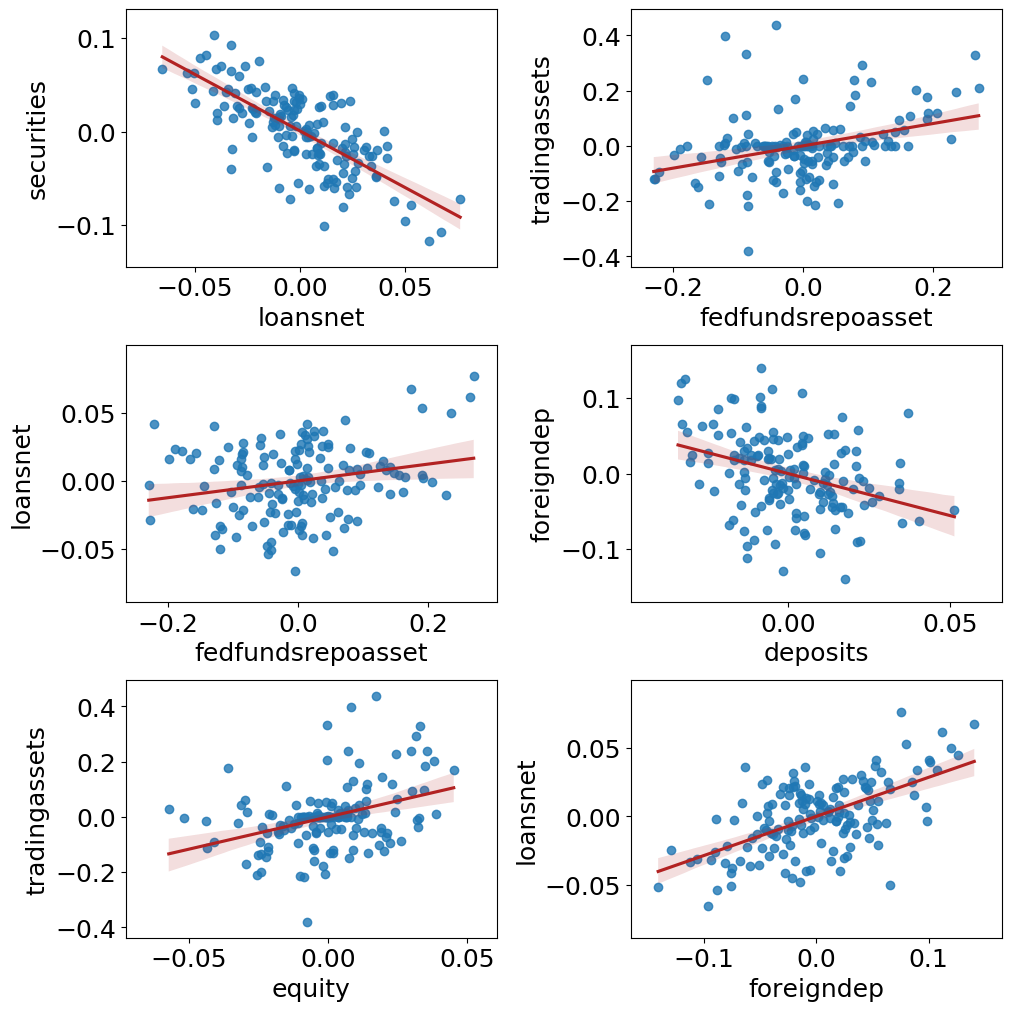

In [36]:
fig, ax = plt.subplots(3,2,figsize=(10,10),  constrained_layout=True)
ax = ax.ravel()


sns.regplot(x="loansnet", y="securities",ax=ax[0], data=df_cycle_assets, robust=True, line_kws={"color":'firebrick'})
sns.regplot(x="fedfundsrepoasset", y="tradingassets",ax=ax[1],  data=df_cycle_assets, line_kws={"color":'firebrick'})
sns.regplot(x="fedfundsrepoasset", y="loansnet",ax=ax[2],  data=df_cycle_assets, line_kws={"color":'firebrick'})
sns.regplot(x="deposits", y="foreigndep",ax=ax[3],  data=df_cycle_liab, line_kws={"color":'firebrick'})
sns.regplot(x=df_cycle_liab.equity, y=df_cycle_assets.tradingassets,ax=ax[4], line_kws={"color":'firebrick'})
sns.regplot(x=df_cycle_liab.foreigndep, y=df_cycle_assets.loansnet,ax=ax[5], line_kws={"color":'firebrick'})


plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_scatterplots_7613.png')

Share of balance sheet positions

Compute shares

In [37]:
df_agg

year  quarter       date        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets   otherassets    otherliab
0    1976.0      1.0 1976-03-31  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0  5.979932e+07   32190192.0
1    1976.0      2.0 1976-06-30  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0  6.314197e+07   35562537.0
2    1976.0      3.0 1976-09-30  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0  6.542551e+07   34335681.0
3    1976.0      4.0 1976-12-31  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0  6.589929e+07   33804637.0
4    1977.0      1.0 1977-03-31  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0  6.847658e+07   37199022.0
5    1977.0      2.0 1977-06-30  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0  7.105964e+07   38182517.0
6    1977.0      3.0 1977-09-30  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0  7.114599e+07   40983329.0
7    1977.0      4.0 1977-12-31  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0  7.357152e+07   41954411.0
8    1978.0      1.0 1978-03-31  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0  7.595768e+07   43555471.0
9    1978.0      2.0 1978-06-30  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0  8.176384e+07   47992509.0
10   1978.0      3.0 1978-09-30  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0  8.533574e+07   51324227.0
11   1978.0      4.0 1978-12-31  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0  9.345297e+07   69221604.0
12   1979.0      1.0 1979-03-31  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0  9.755706e+07   62916509.0
13   1979.0      2.0 1979-06-30  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0  1.059503e+08   78010387.0
14   1979.0      3.0 1979-09-30  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0  1.135400e+08   87909800.0
15   1979.0      4.0 1979-12-31  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0  1.176389e+08   86418900.0
16   1980.0      1.0 1980-03-31  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0  1.251570e+08   86997490.0
17   1980.0      2.0 1980-06-30  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0  1.302572e+08   94594743.0
18   1980.0      3.0 1980-09-30  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0  1.303950e+08   99121394.0
19   1980.0      4.0 1980-12-31  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0  1.376221e+08   94964077.0
20   1981.0      1.0 1981-03-31  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0  1.477132e+08   98940912.0
21   1981.0      2.0 1981-06-30  7.413774e+09  5.854609e+09  1.927512e+09  3.450669e+08         72471117.0  3.271

In [38]:
#Shares assets
df_agg_share_assets = pd.DataFrame()

for (columnName, columnData) in df_agg.select_dtypes(include=['float64']).iteritems():
    newcolumn = "share" + columnName
    df_agg_share_assets[newcolumn] = df_agg[columnName]/df_agg.assets
    
    
df_agg_share_assets.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets", "sharebhcid", "shareotherliab"], axis=1, inplace=True)

#share assets without loans
df_agg_share_assets_noLoans = df_agg_share_assets.drop(["shareloansnet"], axis=1)

#Shares liabs
df_agg_share_liab = pd.DataFrame()

for (columnName, columnData) in df_agg_liab.select_dtypes(include=['float64']).iteritems():
    newcolumn = "share" + columnName
    df_agg_share_liab[newcolumn] = df_agg_liab[columnName]/df_agg.assets
    
    
df_agg_share_liab.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets"], axis=1, inplace=True)


#Share liabs without deposits
df_agg_share_liab_noDeposit = df_agg_share_liab.drop(["sharedeposits"], axis=1)

Plot shares

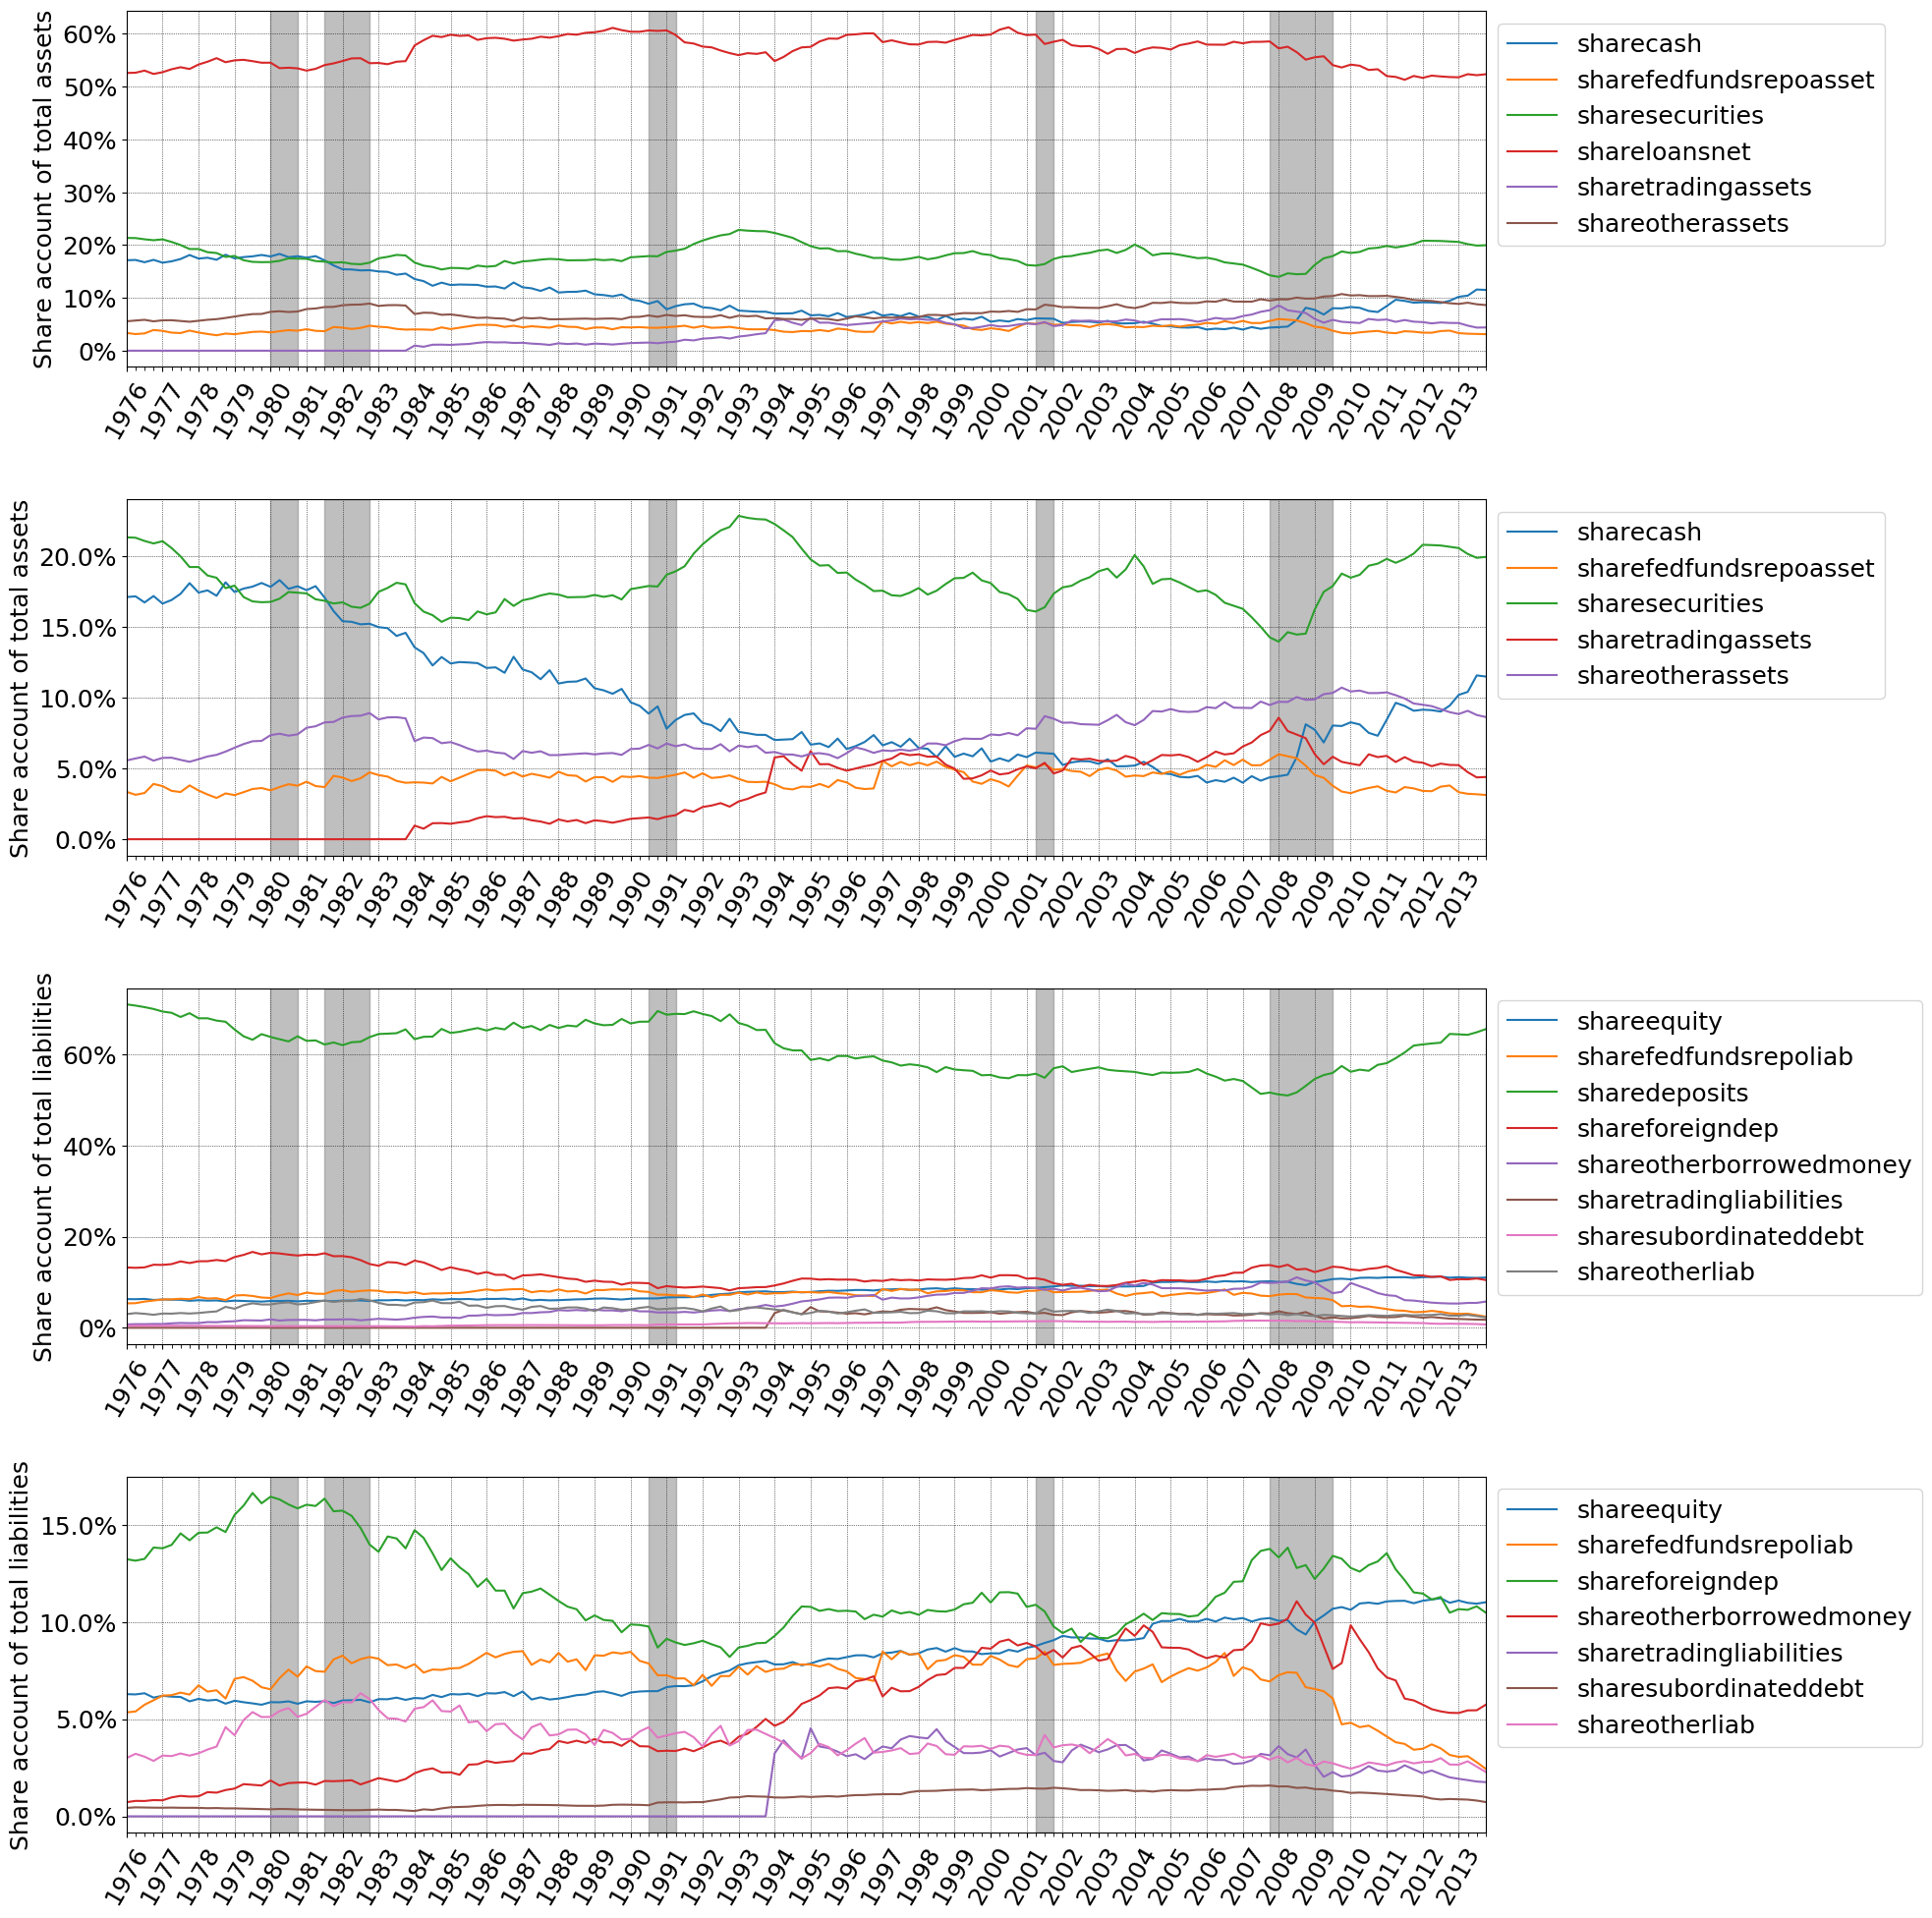

In [39]:
fig, ax = plt.subplots(4,1,figsize=(20,20))
ax= ax.ravel()

#plot share assets subplot
ax[0].plot(df_agg_share_assets*100)
ax[0].set_xticklabels(years, rotation=60)
ax[0].legend(df_agg_share_assets.columns, bbox_to_anchor=(1, 1))
ax[0].set_xticks(range(0,151,4))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].grid(True)
ax[0].set_xlim(0,151)
ax[0].set_ylabel("Share account of total assets")
plot_crisis(ax[0])

#plot without loans
ax[1].plot(df_agg_share_assets_noLoans*100)
ax[1].set_xticklabels(years, rotation=60)
ax[1].legend(df_agg_share_assets_noLoans.columns, bbox_to_anchor=(1, 1))
ax[1].set_xticks(range(0,151,4))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].grid(True)
ax[1].set_xlim(0,151)
ax[1].set_ylabel("Share account of total assets")
plot_crisis(ax[1])

#plot share liab subplot
ax[2].plot(df_agg_share_liab*100)
ax[2].set_xticklabels(years, rotation=60)
ax[2].legend(df_agg_share_liab.columns, bbox_to_anchor=(1, 1))
ax[2].set_xticks(range(0,151,4))
ax[2].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[2].grid(True)
ax[2].set_xlim(0,151)
ax[2].set_ylabel("Share account of total liabilities")
plot_crisis(ax[2])


#plot without deposits
ax[3].plot(df_agg_share_liab_noDeposit*100)
ax[3].set_xticklabels(years, rotation=60)
ax[3].legend(df_agg_share_liab_noDeposit.columns, bbox_to_anchor=(1, 1))
ax[3].set_xticks(range(0,151,4))
ax[3].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[3].grid(True)
ax[3].set_xlim(0,151)
ax[3].set_ylabel("Share account of total liabilities")
plot_crisis(ax[3])

for i in range(4):
    ax[i].yaxis.set_major_formatter(ticker.PercentFormatter())

plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_sharePositions_7613.png')

Lorenz Curve

In [40]:
def lorenz_curve(X, ax):
    X.sort()
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    ## scatter plot of Lorenz curve
    ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
    plt.xticks(rotation=40)
    ax.set_xlim(0,1)
    ## line plot of equality

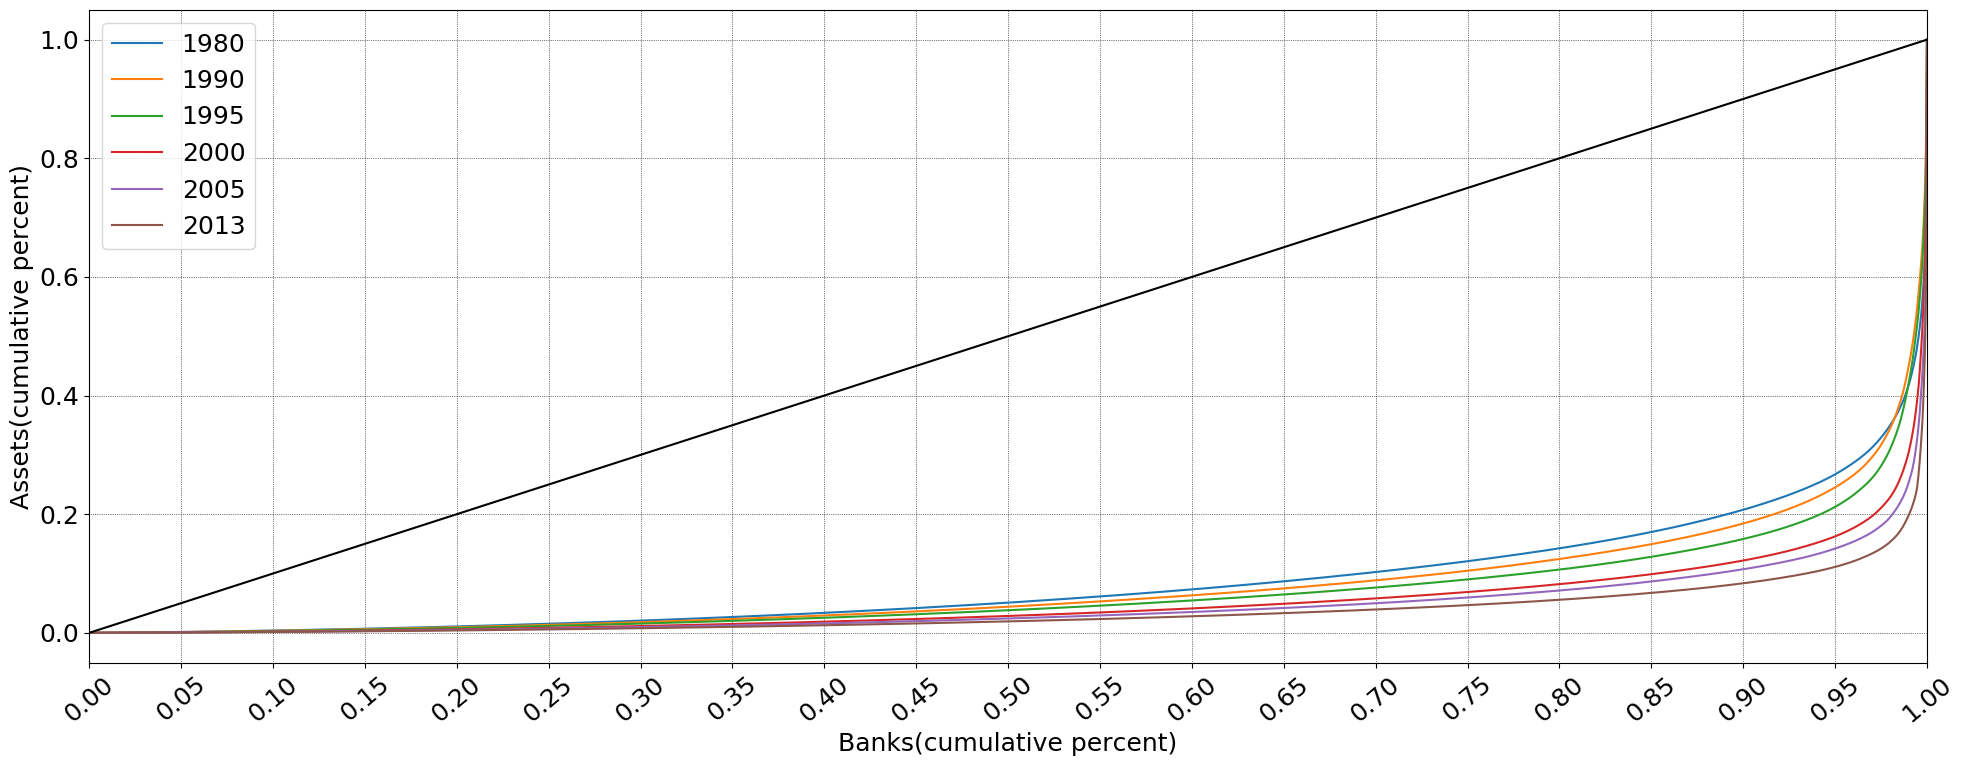

In [51]:
fig, ax = plt.subplots(figsize=(20,10))

df_1980_1 = df_assets[(df_assets.year==1980) & (df_assets.quarter==1)]
df_1985_1 = df_assets[(df_assets.year==1985) & (df_assets.quarter==1)]
df_1990_1 = df_assets[(df_assets.year==1990) & (df_assets.quarter==1)]
df_1995_1 = df_assets[(df_assets.year==1995) & (df_assets.quarter==1)]
df_2000_1 = df_assets[(df_assets.year==2000) & (df_assets.quarter==1)]
df_2005_1 = df_assets[(df_assets.year==2005) & (df_assets.quarter==1)]
df_2013_1 = df_assets[(df_assets.year==2013) & (df_assets.quarter==1)]

lorenz_curve(df_1980_1.assets.values, ax)
#lorenz_curve(df_1985_1.assets.values, ax)
lorenz_curve(df_1990_1.assets.values, ax)
lorenz_curve(df_1995_1.assets.values, ax)
lorenz_curve(df_2000_1.assets.values, ax)
lorenz_curve(df_2005_1.assets.values, ax)
lorenz_curve(df_2013_1.assets.values, ax)

ax.plot([0,1], [0,1], color='k')

ax.legend(["1980", "1990", "1995", "2000", "2005", "2013"])
ax.grid()
ax.set_ylabel("Assets(cumulative percent)")
ax.set_xlabel("Banks(cumulative percent)")

plt.tight_layout()

plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_LorenzCurve_7613.png')


Gini Coefficient

In [42]:
'''
Function to compute gini coefficient for a given array of asset values
'''
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [43]:
'''
Computes for every year and month the gini coefficient
'''
def comp_gini(gr):
    #gr.dropna(subset=["assets"], inplace=True, axis=0)
    coef = gini(gr.assets.values)
    gr = gr.sum()
    gr["gini"] = coef
    return gr

df_assets_copy = df_assets.copy()
df_assets_copy.dropna(subset=["assets"], inplace=True)
df_assets_gini = df_assets_copy.groupby("date").apply(comp_gini)

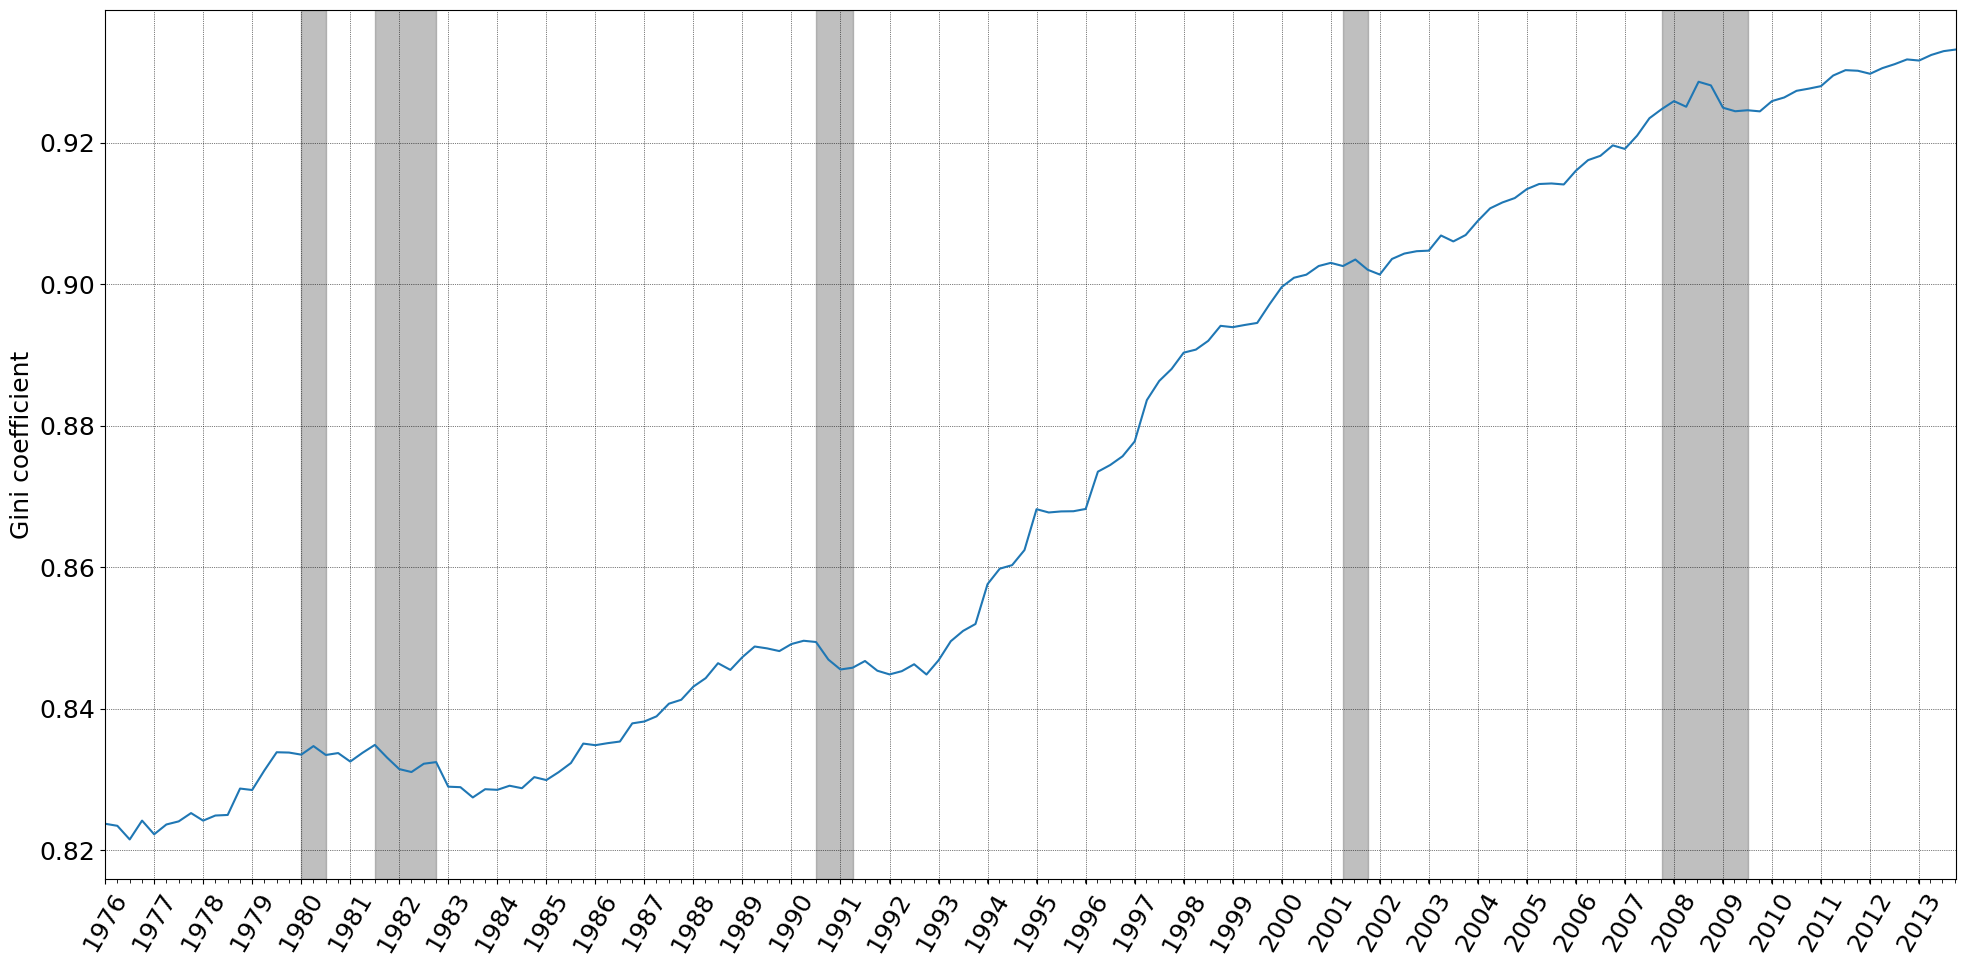

In [49]:
#plot gini coefficient with xaxis as datetime objects


fig, ax = plt.subplots(figsize=(20,10))

year_locator = mlt.dates.YearLocator(1, month=3, day=31)
years_fmt = mlt.dates.DateFormatter('%Y')

ax.plot(df_assets_gini.gini)

ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(years_fmt)
plt.xticks(rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_ylabel("Gini coefficient")
ax.grid()
ax.set_xlim(datetime.datetime(1976,3,31), datetime.datetime(2013,12,31))
        
plot_crisis_datetime(ax)

plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_clean_gini_7613.png')

In [45]:
#alternative way to compute gini coefficient per year with loop
array = []

for year in years:
    
    temp = df_assets[(df_assets.year==float(year))]
    temp.dropna(subset=["assets"], inplace=True)
    #print(temp.assets.isna().value_counts())
    array.append(gini(temp.assets.values))


s_gini_coeff = pd.Series(array, index=years)



Banks by asset categories